<a href="https://colab.research.google.com/github/TheNeuvillette/Data-Science-Fundamentals-DCBP/blob/main/TheNeuvillette_CodingTask1_V05_Tested.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Data Science Fundamentals - DCBP, solved by TheNeuvilette

Disclaimer: CT-1.2 and CT-1.3 were done with the help of GitHub user "Orsli". The code originally stems from them, but was adapted.

## Task summary (maximum 12.5 points)

- **CT-1.1** Write a method (function) which removes the header information in the
datafile and saves that information into a separate textfile. [0.5 points]
- **CT-1.2** Write a function which reduces the data resolution by merging/averaging columns such that there is only one column per 1 nm. [2.0 points]  
- **CT-1.3** Now generalize the above merging so that it works for any number nm er column. [2.0 points]
- **CT-1.4** Implement the saving of the reduced dataset to a file. Do this (1) by writing an explicit loop (write line by line) and (2) by using pandas methods. Measure the running times of the two approaches. [2.0 points]
- **CT-1.5** Write a function which takes two wavelengths as input and plots the difference of the data at these lengths over time. [2.0 points]
- **CT-1.6** Let the x-axis be in seconds, label the axes with names and units, label the plot with color and legend, make a title for the plot. Save the plot to a file. [2.0 points]
- **CT-1.7** Plot the full and some reduced datasets in the same figure. Is there any visual difference? [2.0 points]

## Coding Task 1:



**Pre-CT:** Activating all libraries needed during the coding task.



In [1]:
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt



**Pre-CT:** Installing Google Colab.



In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive




**Pre-CT:** Defining all links to the used files.



In [3]:
input_file_path = '/content/drive/MyDrive/Data_Science/CCD-Data.csv'
output_file_path = '/content/drive/MyDrive/Data_Science/CCD-Data_without_header.csv'
header_file_path = '/content/drive/MyDrive/Data_Science/CCD-Header.txt'
file_path_loop = "/content/drive/MyDrive/Data_Science/Loop_Red_CCD-Data.csv"
file_path_pandas = "/content/drive/MyDrive/Data_Science/Pandas_Red_CCD-Data.csv"

**Pre-CT:** Defining some other universal variables

In [4]:
df = pd.read_csv(input_file_path,delimiter=',')

*   **CT-1.1**: Write a method (function) which removes the header information in the datafile and saves that information into a separate textfile. [0.5 points]



In [5]:
#1.1

def CCD_remove_header(input_file_path, output_file_path, header_file_path):
    """
    Takes a csv-file (CCD-Data.csv) and creates two new files:
    One file containing the header (CCD-Header.txt) and one containing the data (CCD-Data_without_header.csv).
    The original csv-file (CCD-Data.csv) is not modified or deleted.

    Args:
        input_file_path: Path to the csv-file (CCD-Data.csv).
        output_file_path: Path of the newly created data-file (CCD-Data_without_header.csv)
        header_file_path: Path of the newly created header-file (CCD-Header.txt)
    """
    # Identify CCD header and data.
    with open(input_file_path, 'r') as input_file:
        lines = input_file.readlines()
    header = lines.pop(0)

    # Save the CCD data in a new CCD file
    with open(output_file_path, 'w') as output_file:
        output_file.writelines(lines)

    # Save the CCD header to a separate text file
    with open(header_file_path, 'w') as header_file:
        header_file.write(header)

CCD_remove_header(input_file_path, output_file_path, header_file_path)

*   **CT-1.2**: Write a function which reduces the data resolution by merging/averaging columns such that there is only one column per 1 nm. [2.0 points]  




In [6]:
#1.2

def Reduce_resolution_to_1_nm(df):
    """
    Reduces the data resolution by merging/averaging columns such that there is only one column per 1 nm
    Args:
        df (pd.DataFrame): Input DataFrame.
    Returns:
        pd.DataFrame: A new DataFrame containing the averaged values.
    """

    # Select columns from the 4th to the second-to-last column
    selected_columns = df.iloc[:, 3:-1]

    # Convert column names to integers
    new_columns = {col: math.floor(float(col)) for col in selected_columns.columns}
    selected_columns = selected_columns.rename(columns=new_columns)

    # Calculate mean value for each group of columns with the same integer name
    df_red = selected_columns.groupby(selected_columns.columns, axis=1).mean()

    return df_red

df = pd.read_csv(input_file_path,delimiter=',')
df_red = Reduce_resolution_to_1_nm(df)
df_red.head()

,316,317,318,319,320,321,322,323,324,325,...,770,771,772,773,774,775,776,777,778,779
0,0.329672,-0.166957,-0.064746,0.133130,0.123705,-0.249831,0.271327,-0.093151,-0.123458,-0.026454,...,-0.038470,-0.038555,-0.038021,-0.039290,-0.038654,-0.036496,-0.038835,-0.038145,-0.038333,-0.037679
1,-0.044412,-0.411839,-0.133472,2.032979,-0.387814,-0.031617,0.322955,1.744725,-0.051639,-0.147937,...,-0.038387,-0.038100,-0.038118,-0.038622,-0.038308,-0.036896,-0.039010,-0.038400,-0.037930,-0.037812
2,0.338219,-0.094507,-0.024912,0.061890,-0.226986,0.107871,0.121011,-0.208504,-0.418836,0.005751,...,-0.038472,-0.038063,-0.038303,-0.039200,-0.038397,-0.036932,-0.038245,-0.037664,-0.037514,-0.037057
3,-0.049682,0.027980,-0.008338,-0.088350,0.070348,-0.013674,0.307321,0.159532,-0.047932,0.080549,...,-0.037574,-0.037775,-0.037678,-0.038711,-0.038133,-0.036972,-0.038177,-0.037273,-0.036996,-0.036614
4,0.335086,-0.162378,-0.102281,0.045717,-0.088278,0.042099,0.304675,-0.261077,-0.009424,0.153932,...,-0.038489,-0.038433,-0.038135,-0.038991,-0.038178,-0.037010,-0.038540,-0.038076,-0.037606,-0.038132


- **CT-1.3**: Now generalize the above merging so that it works for any number nm er column. [2.0 points]

In [7]:
#1.3

def Reduce_resolution_advanced (df, start_wavelength=316 , nm_steps=1):
    """
    Reduces the data resolution by merging/averaging columns in a user defined way.
    Args:
        df (pd.DataFrame): Input DataFrame.
        start_wavelength: The wavelength at which the columns are merged.
        nm_steps: Difference between two concecutive columns.
    Returns:
        pd.DataFrame: A new DataFrame containing the averaged values.
    """

    # Reduce colums to 1nm (same as the function "Reduce_resolution_to_1_nm").
    selected_columns = df.iloc[:, 3:-1]
    new_columns = {col: math.floor(float(col)) for col in selected_columns.columns}
    selected_columns = selected_columns.rename(columns=new_columns)
    selected_columns = selected_columns.groupby(selected_columns.columns, axis=1).mean()

    # Merge nm_n columns into one column
    new_columns = {col: (float(col)-start_wavelength)//nm_steps for col in selected_columns.columns}
    selected_columns = selected_columns.rename(columns=new_columns)
    selected_columns = selected_columns.groupby(selected_columns.columns,axis=1).mean()

    # Fix the column labels
    new_columns = {col: int((float(col)*nm_steps+start_wavelength)) for col in selected_columns.columns}
    selected_columns = selected_columns.rename(columns=new_columns)
    return selected_columns

df_red = Reduce_resolution_advanced(df, 317, 3)
df_red.head()

,314,317,320,323,326,329,332,335,338,341,...,752,755,758,761,764,767,770,773,776,779
0,0.329672,-0.032858,0.048401,-0.081021,0.014096,0.055507,0.083904,-0.067977,0.094923,0.103962,...,-0.039817,-0.040458,-0.040204,-0.040698,-0.040074,-0.039362,-0.038349,-0.038146,-0.038438,-0.037679
1,-0.044412,0.495889,-0.032159,0.515050,-0.031152,-0.035293,0.066643,0.127908,0.256517,0.172139,...,-0.040246,-0.040853,-0.040337,-0.040585,-0.040473,-0.039704,-0.038202,-0.037942,-0.038447,-0.037812
2,0.338219,-0.019176,0.000632,-0.207196,0.048026,0.086286,0.089059,-0.021331,0.191918,0.229201,...,-0.040272,-0.040932,-0.040654,-0.041190,-0.040467,-0.039310,-0.038279,-0.038176,-0.037808,-0.037057
3,-0.049682,-0.022902,0.121332,0.064050,0.030634,-0.040678,0.142017,-0.010588,0.070605,0.035324,...,-0.039515,-0.040066,-0.039649,-0.040195,-0.039600,-0.038583,-0.037676,-0.037939,-0.037482,-0.036614
4,0.335086,-0.072981,0.086165,-0.038856,0.018567,0.027823,0.081656,0.263866,0.142039,0.066480,...,-0.039865,-0.040628,-0.040023,-0.040484,-0.039755,-0.039443,-0.038352,-0.038060,-0.038074,-0.038132


*  **CT-1.4**: Implement the saving of the reduced dataset to a file. Do this (1) by writing an explicit loop (write line by line) and (2) by using pandas methods. Measure the running times of the two approaches. [2.0 points]


In [ ]:
""" Important: To be able to run CT-1.4, CT-1.2 or CT-1.3 had to be run previously."""

In [8]:
%%time
# Method 1: By using explicit loop:
with open(file_path_loop, 'w') as file:
    for index, row in df_red.iterrows():
        file.write(','.join(map(str, row.values)) + '\n')

print(f"Data saved to {file_path_loop} using explicit loop.")

Data saved to /content/drive/MyDrive/Data_Science/Loop_Red_CCD-Data.csv using explicit loop.
CPU times: user 114 ms, sys: 3.9 ms, total: 118 ms
Wall time: 748 ms


In [9]:
%%time
# Method 2: By using pandas:
import pandas as pd
df_red.to_csv(file_path_pandas, index=False)
print(f"Data saved to {file_path_pandas} using Pandas method.")

Data saved to /content/drive/MyDrive/Data_Science/Pandas_Red_CCD-Data.csv using Pandas method.
CPU times: user 89.2 ms, sys: 11.3 ms, total: 100 ms
Wall time: 608 ms


* **CT-1.5:** Write a function which takes two wavelengths as input and plots the difference of the data at these lengths over time. [2.0 points]

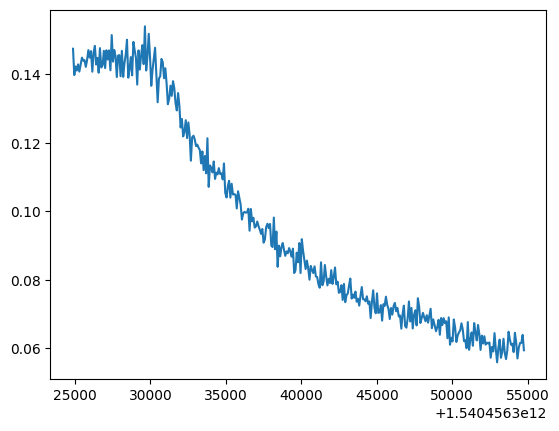

In [10]:
#1.5

def plot_wavelength_difference(df, a, b):
    x = df.iloc[1:,2]
    y = df.iloc[1:,a]-df.iloc[1:,b]
    plt.plot(x,y)
    return

plot_wavelength_difference(df, 1000, 2000)

- **CT-1.6:** Let the x-axis be in seconds, label the axes with names and units, label the plot with color and legend, make a title for the plot. Save the plot to a file. [2.0 points]


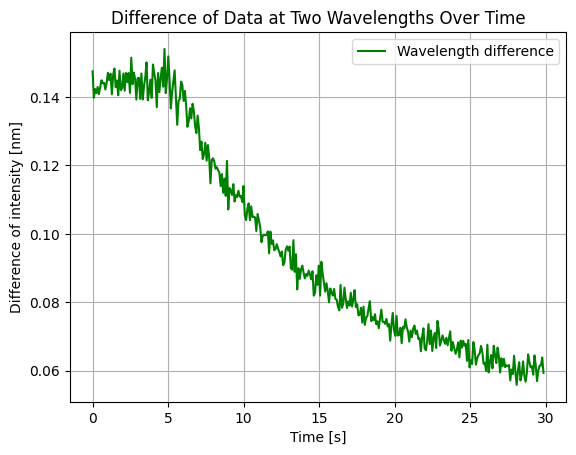

In [11]:
#1.6

def plot_wavelength_difference_advanced(df, a, b):
    x = (df.iloc[1:, 2] - df.iloc[1, 2]) / 1000
    y = df.iloc[1:,a]-df.iloc[1:,b]
    plt.plot(x,y, c="g", label="Wavelength difference")
    plt.xlabel('Time [s]')
    plt.ylabel('Difference of intensity [nm]')
    plt.title('Difference of Data at Two Wavelengths Over Time')
    plt.grid(True)
    plt.legend()
    plt.show()
    return

plot_wavelength_difference_advanced(df, 1000, 2000)

- **CT-1.7:** Plot the full and some reduced datasets in the same figure. Is there any visual difference? [2.0 points]

In [ ]:
""" Important: To be able to run CT-1.7, CT-1.2 or CT-1.3 had to be run previously."""

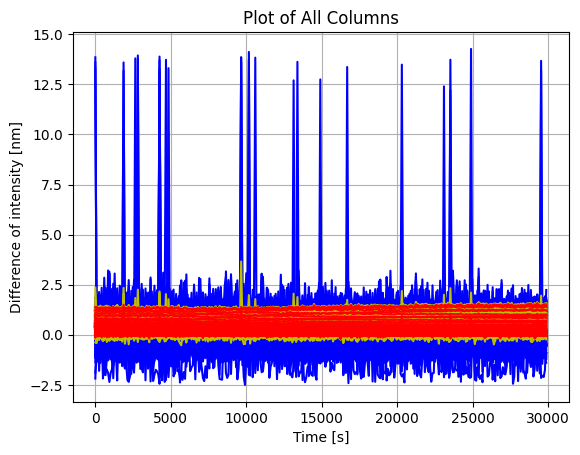

In [12]:
#1.7

x = (df.iloc[1:, 2] - df.iloc[1, 2])

# Plot full data:
y_full_data = df.iloc[1:, 3:]

# Plot 1nm reduced data:
df_red = Reduce_resolution_to_1_nm(df)
y_red_1nm_data = df_red.iloc[1:, 3:]

# Plot 3nm reduced data:
df_red = Reduce_resolution_advanced(df, nm_steps=3)
y_red_3nm_data = df_red.iloc[1:, 3:]

plt.plot(x, y_full_data, color='b', label='Full data')
plt.plot(x, y_red_1nm_data, color='y', label='1nm reduced data')
plt.plot(x, y_red_3nm_data, color='r', label='3nm reduced data')
plt.xlabel('Time [s]')
plt.ylabel('Difference of intensity [nm]')
plt.title("Plot of All Columns")
plt.grid(True)
plt.show()